<a href="https://colab.research.google.com/github/HassanSaeed107/UAE_auto_cars/blob/main/model_dubai_auto_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/dubai_auto_cars_cleaned.csv')
df.head()

,price,brand,model,trim,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,...,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
0,129900,Dodge,Ram,1500 SLT Crew,47566,2021,3,GCC Specs,4,Pick Up Truck,...,Unknown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
1,319900,Alfa Romeo,Stelvio,Quadrifoglio,8914,2020,4,GCC Specs,5,SUV,...,Black,Yes,"Abu Hail, Deira, Dubai, UAE",UAE,Dubai,Deira,Abu Hail,25.275416,55.346450,Dealership/Certified Pre-Owned
2,149900,Audi,Q5,S-line,72205,2019,5,GCC Specs,5,SUV,...,Brown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
3,79900,Alfa Romeo,GIULIETTA,Veloce,49193,2021,3,GCC Specs,4,Hatchback,...,Black,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
4,154900,GAC,GS8,GL,30,2024,0,GCC Specs,5,SUV,...,Other Color,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned


# Feature Engineering

In [ ]:
#Create new feature 'age_at_purchase'

df['age_at_purchase'] = df['year'] - df['vehicle_age_years']

# Model Building

In [ ]:
# Split data into train and test sets
X = df[['kilometers', 'year', 'seating_capacity']]  # Features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('LinearRegression:', y_pred)

LinearRegression: [231471.092172   153089.39452389 211369.81015526 ... 119804.86124804
 167859.32407609 133665.7785244 ]


# Model Evaluation

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 28434461996.646748


# Time Forecasting

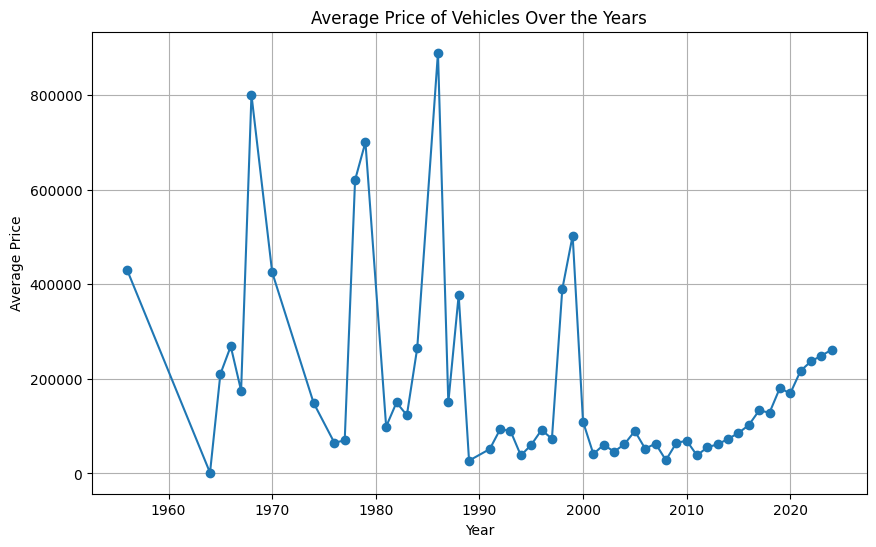

In [ ]:
average_price_per_year = df.groupby('year')['price'].mean()

# Plot the average price of vehicles over the years
plt.figure(figsize=(10, 6))
plt.plot(average_price_per_year.index, average_price_per_year.values, marker='o', linestyle='-')
plt.title('Average Price of Vehicles Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# Feature Importances

In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Get the top 10 most important features
top_10_features = X.columns[sorted_indices][:10]
top_10_importances = feature_importances[sorted_indices][:10]

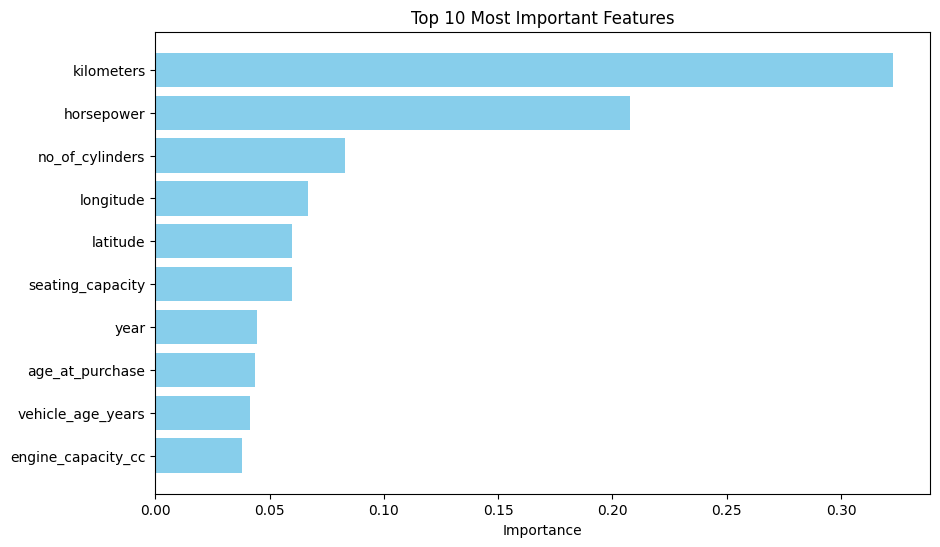

In [ ]:
# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

# Segmentation Analysis

In [ ]:
# Select features for segmentation analysis
segmentation_features = ['price', 'kilometers', 'year']

# Standardize the data
segmentation_data = cleaned_df[segmentation_features]
segmentation_data_standardized = (segmentation_data - segmentation_data.mean()) / segmentation_data.std()

print(segmentation_features)
print(segmentation_data_standardized)


['price', 'kilometers', 'year']
         price  kilometers      year
0    -0.171597   -0.379961  0.558085
1     0.843794   -0.808043  0.364430
2    -0.064714   -0.107077  0.170774
3    -0.438805   -0.361942  0.558085
4    -0.037993   -0.906436  1.139052
...        ...         ...       ...
9948  0.283191    1.208611 -0.410193
9949 -0.448959    0.920653 -0.797504
9950  0.058736    0.577320 -0.022881
9951 -0.529121    2.305063 -1.378471
9952 -0.384829    0.931729 -0.216537

[9953 rows x 3 columns]


In [ ]:
# Save the cleaned dataset to a CSV file

df.to_csv('model_dubai_auto_cars_cleaned.csv', index=False)
print("Cleaned dataset has been saved to 'model_dubai_auto_cars_cleaned.csv'")

Cleaned dataset has been saved to 'model_dubai_auto_cars_cleaned.csv'
